In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.core.interactiveshell import InteractiveShell



InteractiveShell.ast_node_interactivity = 'all' 
plt.style.use('ggplot')

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
import json

model_root = 'trained_models/reinforcement_learning'
results = []
for model_name in os.listdir(model_root):
    with open(os.path.join(model_root, model_name, 'config.json')) as f:
        data = json.load(f)
    
    base_model = data['starting_actor_critic']
    if base_model is not None:
        base_model = os.path.basename(base_model)
    progress = pd.read_csv(os.path.join(model_root, model_name, 'progress.txt'), sep='\t')
    
    r = pd.read_csv(os.path.join('reports', f'{model_name}.csv'))
    results.append(
        {'model':model_name, 
         'base_model':base_model, 
         'epochs':progress.Epoch.count(),
         'train_enemies':''.join([str(e) for e in data['enemies']]), 
         'progress':progress,
         'result':r
        })

In [4]:
df = pd.DataFrame([(l['model'], l['base_model'], l['epochs'], l['train_enemies']) for l in results], 
                  columns=['model', 'base_model', 'epochs', 'train_enemies'])
df

,model,base_model,epochs,train_enemies
0,1590741556.9109056,1590579471.1575735,2000,3458
1,1591851592.3176994,1591844700.491681,250,1267
2,1590827635.8673058,1590579471.1575735,2000,3467
3,1591810052.4616268,1591803558.255182,250,1267
4,1591873289.2477565,1591865869.114568,250,1267
5,1591803558.255182,None,250,1267
6,1591950327.7396142,1591942954.9945362,250,1267
7,1591429808.8947563,56.86_1591208496.467009.pickle,2000,1267
8,1590741419.5509562,1590579471.1575735,4,3458
9,1591521804.2132065,61.38_1591194194.380356.pickle,2000,1267


In [5]:
lists = [['1591261004.787129'], ['1591803558.255182'], ['1591891998.8024027']]
for i, row in df.iterrows():
    for l in lists:
        if row.base_model in l:
            l.append(row.model)

In [6]:
progress_list = [r['progress'] for r in results if r['model'] in lists[0]]
progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
progress_df['Epoch'] = progress_df['index']
progress_df.drop(columns='index', inplace=True)
progress_df.set_index('Epoch', inplace=True)

In [7]:
t = []
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    progress_df['Time'] = progress_df['Time'].diff(1)
    
    t.append(progress_df.Time.median())

In [8]:
np.mean(t)
np.median(t)

26.880122582117338

28.028755426406633

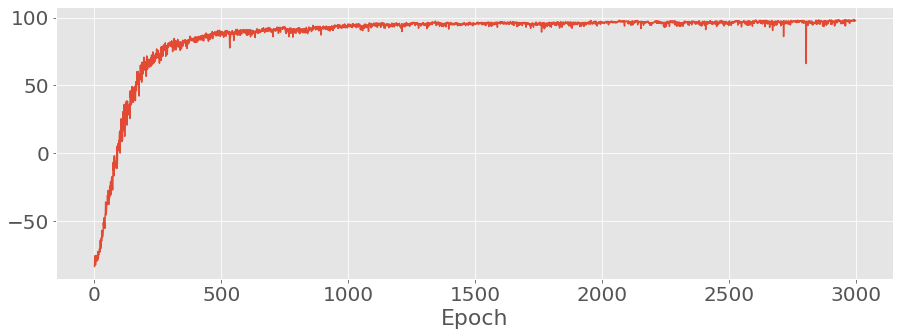

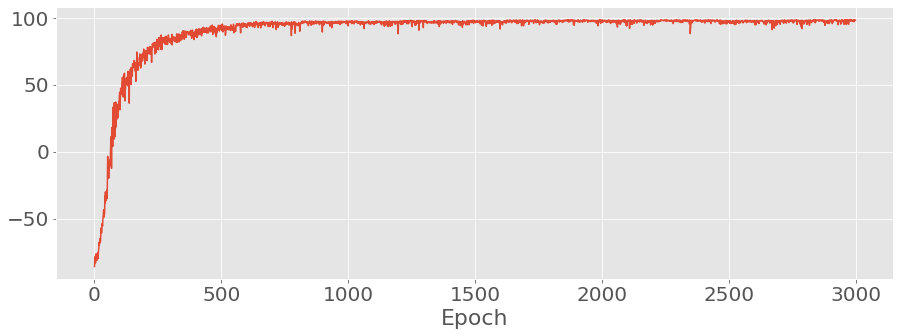

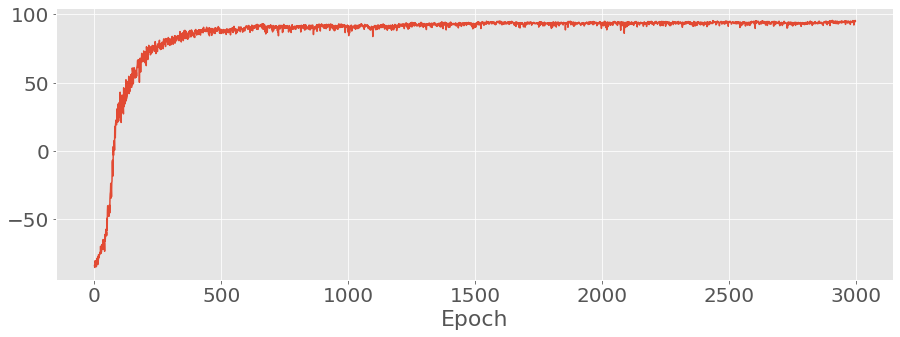

In [9]:
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    _ = progress_df.AverageEpRet.plot()
    plt.show()
    progress_df.reset_index().to_csv(f'data_for_plots/ppo_{i}_progress.csv', index=False)

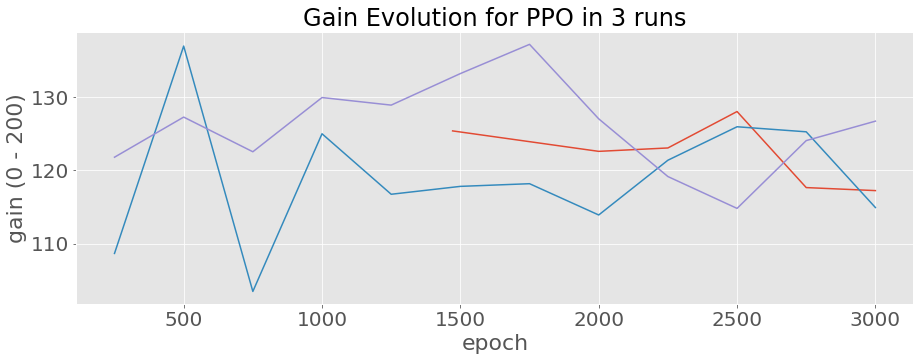

In [10]:
for i, experiment in enumerate(lists):
    progress_list = [(r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in experiment]
    progress = pd.DataFrame(progress_list, columns=['epoch', 'score'])
    progress['epoch'] = progress.epoch.cumsum()
    progress.set_index('epoch', inplace=True)
    _ = progress.score.plot()
#     plt.show()
    progress.reset_index().to_csv(f'data_for_plots/ppo_{i}_result.csv', index=False)    
_ = plt.ylabel('gain (0 - 200)')
_ = plt.title('Gain Evolution for PPO in 3 runs')
plt.savefig('paper/images/ppo_gain_evolution_3_runs.eps', format='eps')

In [11]:
progress_list = [(r['model'], r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in lists[2]]
progress = pd.DataFrame(progress_list, columns=['model', 'epoch', 'score'])
progress['epoch'] = progress.epoch.cumsum()
progress.set_index('epoch', inplace=True)

In [12]:
[r['result'] for r in results if r['model']=='1591935751.1014764'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration
0,1,199.610000,99.600000,0.000000,0.0,96.0,100.0,0,0.0,159,300
1,2,189.143333,89.133333,0.000000,0.0,78.0,94.0,0,0.0,150,274
2,3,85.010000,5.333333,20.333333,0.0,0.0,58.0,0,70.0,226,537
3,4,80.170000,3.493333,23.333333,0.0,0.0,31.6,0,60.0,388,964
4,5,158.830000,58.820000,0.000000,0.0,34.6,80.2,0,0.0,253,529
5,6,194.370000,94.360000,0.000000,0.0,78.4,100.0,0,0.0,166,246
6,7,191.170000,91.160000,0.000000,0.0,70.0,94.0,0,0.0,123,166
7,8,140.610000,40.600000,0.000000,0.0,3.4,72.4,0,0.0,261,722


In [13]:
last = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']
found = [r['result'] for r in results if r['model'] in last]

r3 = [8 / np.sum(1/f.gain) for f in found]

In [14]:
last = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
found = [r['result'] for r in results if r['model'] in last]

r2 = [8 / np.sum(1/f.gain) for f in found]

In [15]:
r2

[122.58071320805254, 113.89813214476209, 127.01880705967213]

In [16]:
r3

[117.22484876609629, 114.91506994434918, 126.70141895181527]

In [17]:
r = pd.DataFrame(zip(r2, r3), columns=['2000 epochs', '3000 epochs'])

In [18]:
r

,2000 epochs,3000 epochs
0,122.580713,117.224849
1,113.898132,114.915070
2,127.018807,126.701419


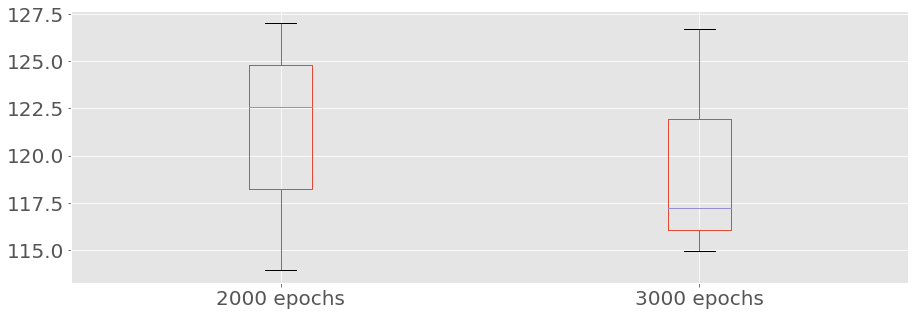

In [19]:
_ = r.boxplot()
plt.savefig('paper/images/final_epochs_comparison.eps', format='eps')

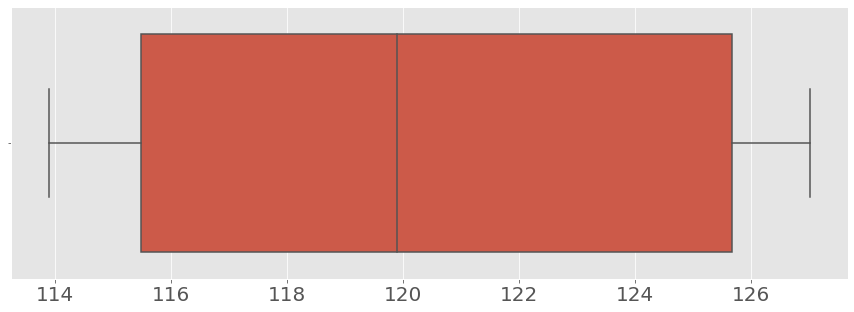

In [20]:
_ = sns.boxplot(r)

In [21]:
np.mean(r3)
np.median(r3)

np.mean(r2)
np.median(r2)

119.61377922075359

117.22484876609629

121.1658841374956

122.58071320805254

In [22]:
last2 = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
last3 = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']

found = [r['result'].set_index('enemy').avg_duration for r in results if r['model'] in last2]

# r2 = [8 / np.sum(1/f.gain) for f in found]

In [23]:
found[2]

enemy
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
Name: avg_duration, dtype: float64

In [24]:
model_to_gain = dict()
for r in results:
    model_to_gain[r['model']] = 8 / np.sum(1 / r['result'].gain)

In [25]:
df['gain'] = df.model.apply(lambda m: model_to_gain[m])

In [26]:
[r['result'] for r in results if r['model']=='1591972086.6519217'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration
0,1,199.810000,99.800000,0.000000,0.0,98.0,100.0,0,0.0,159,341
1,2,190.343333,90.333333,0.000000,0.0,84.0,94.0,0,0.0,151,233
2,3,70.276667,0.266667,30.000000,0.0,0.0,6.0,0,50.0,335,437
3,4,64.110000,0.433333,36.333333,0.0,0.0,13.0,0,70.0,435,928
4,5,174.610000,74.600000,0.000000,0.0,60.4,91.0,0,0.0,218,496
5,6,195.850000,95.840000,0.000000,0.0,89.2,98.2,0,0.0,153,217
6,7,193.270000,93.260000,0.000000,0.0,80.2,94.6,0,0.0,123,153
7,8,141.896667,42.553333,0.666667,0.0,0.0,86.2,0,10.0,195,649


In [27]:
df

,model,base_model,epochs,train_enemies,gain
0,1590573752.3423483,None,228,1367,26.687000
1,1590579471.1575735,None,1048,1267,100.099053
2,1590649982.3414495,1590579471.1575735,1336,1267,122.133110
3,1590741419.5509562,1590579471.1575735,4,3458,95.360921
4,1590741556.9109056,1590579471.1575735,2000,3458,44.165203
5,1590827635.8673058,1590579471.1575735,2000,3467,75.309663
6,1590918282.3727078,1590579471.1575735,1665,1367,110.197467
7,1591007624.3262362,1590579471.1575735,1594,2367,136.106111
8,1591084878.9942527,1590579471.1575735,2000,2467,85.221185
9,1591130472.260961,None,2000,2367,99.979586


In [56]:
4/np.sum(1/results[0]['result'].gain[[0, 1, 5, 6]])

22.0625923959487

In [60]:
last3_names = ['1591641901.9027252', '1591880695.9546342', '1591972086.6519217']
for model_name in last3_names:
    train_hmean = [4/np.sum(1/r['result'].gain[[0, 1, 5, 6]]) for r in results if r['model']==model_name][0]
    print(model_name, train_hmean)

1591641901.9027252 198.40455154111183
1591880695.9546342 197.5732011717459
1591972086.6519217 194.75641587218357


In [62]:
for model_name in last3_names:
    train_hmean = [r['result'].gain for r in results if r['model']==model_name][0]
    print(model_name, train_hmean)

1591641901.9027252 0    198.410000
1    199.743333
2     58.943333
3     58.343333
4    172.610000
5    195.730000
6    199.790000
7    122.170000
Name: gain, dtype: float64
1591880695.9546342 0    199.076667
1    199.276667
2     46.676667
3     66.503333
4    165.650000
5    196.950000
6    195.050000
7    145.490000
Name: gain, dtype: float64
1591972086.6519217 0    199.810000
1    190.343333
2     70.276667
3     64.110000
4    174.610000
5    195.850000
6    193.270000
7    141.896667
Name: gain, dtype: float64


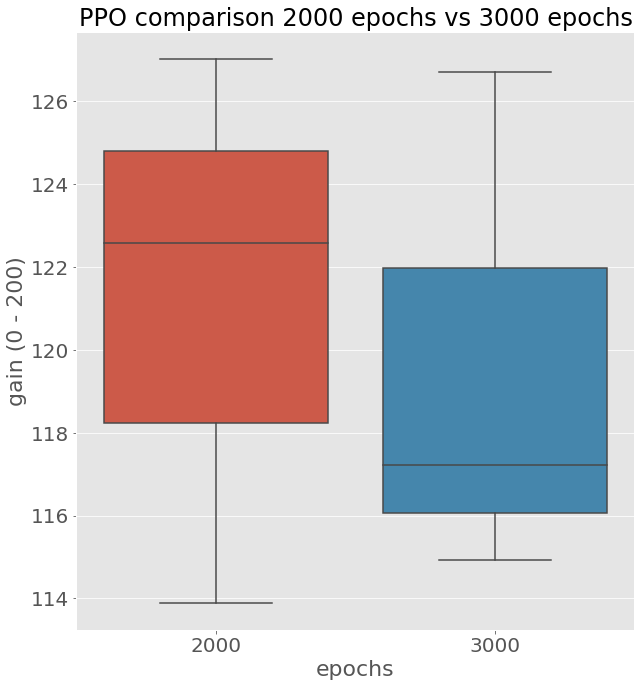

In [61]:
last2 = pd.DataFrame([122.580713, 113.898132, 127.018807], columns=['gain'])
last3 = pd.DataFrame([117.224849, 114.915070, 126.701419], columns=['gain'])
last2['epochs'] = 2000
last3['epochs'] = 3000
c = pd.merge(last2, last3, how='outer')

fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='epochs', y='gain', data=c, ax=ax)
_ = ax.set_ylabel('gain (0 - 200)')
_ = ax.set_title('PPO comparison 2000 epochs vs 3000 epochs')
fig.savefig('paper/images/ppo_2000_vs_3000_epochs.eps', format='eps')

In [ ]:
cascade = pd.DataFrame([43.005925, 45.693536, 59.552746, 89.266536], columns=['gain'])
ri = pd.DataFrame([117.224849, 114.915070, 126.701419, None], columns=['gain'])
ri['initialization'] = 'random'
cascade['initialization'] = 'pso'
c = pd.merge(ri, cascade, how='outer')


fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='initialization', y='gain', data=c, ax=ax)
_ = ax.set_title('PPO random initialization vs PSO cascade')
_ = ax.set_ylabel('gain (0 - 200)')
fig.savefig('paper/images/random_vs_pso_initialization.eps', format='eps')